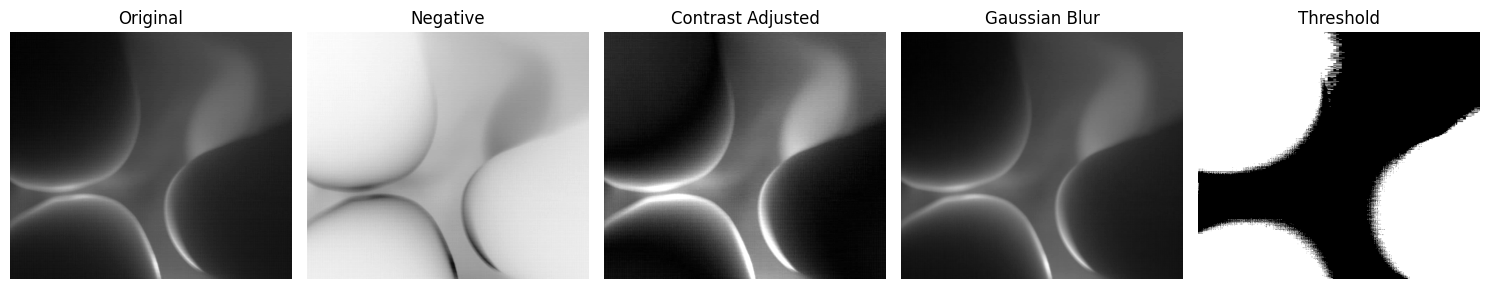

(array([[251, 251, 251, ..., 188, 188, 188],
        [251, 251, 251, ..., 190, 190, 190],
        [254, 254, 254, ..., 194, 194, 194],
        ...,
        [237, 239, 239, ..., 233, 233, 236],
        [237, 239, 239, ..., 233, 233, 236],
        [238, 240, 240, ..., 234, 234, 237]], dtype=uint8),
 array([[42, 42, 42, ..., 84, 84, 84],
        [42, 42, 42, ..., 80, 80, 80],
        [48, 48, 48, ..., 72, 72, 72],
        ...,
        [14, 18, 18, ...,  6,  6, 12],
        [14, 18, 18, ...,  6,  6, 12],
        [16, 20, 20, ...,  8,  8, 14]], dtype=uint8),
 array([[ 4,  4,  4, ..., 65, 65, 65],
        [ 3,  3,  3, ..., 64, 64, 64],
        [ 3,  3,  3, ..., 64, 64, 64],
        ...,
        [17, 17, 17, ..., 21, 21, 21],
        [17, 16, 17, ..., 21, 21, 21],
        [16, 16, 16, ..., 21, 21, 21]], dtype=uint8),
 array([[255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ..., 2

In [36]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def transform_image(image_path):
    """
    Apply transformations to simulate 'under plasma' conditions.
    """
    # Load the grayscale image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 1. Negative Transformation
    img_negative = cv2.bitwise_not(img)

    # 2. Contrast Adjustment
    alpha = 2.0  # Contrast control (1.0-3.0)
    beta = -50   # Brightness control (-100 to 100)
    img_contrast = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

    # 3. Gaussian Blur (Optional: To simulate soft edges)
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)

    # 4. Thresholding (Optional: To enhance heat regions)
    _, img_threshold = cv2.threshold(img_negative, 200, 255, cv2.THRESH_BINARY)

    # Plot the original and transformed images
    images = [img, img_negative, img_contrast, img_blur, img_threshold]
    titles = ['Original', 'Negative', 'Contrast Adjusted', 'Gaussian Blur', 'Threshold']
    
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    return img_negative, img_contrast, img_blur, img_threshold

# Test the transformation on a sample image
test_image_path = "D:\\Frames\\vid5\\frame_29839.jpg"
transform_image(test_image_path)


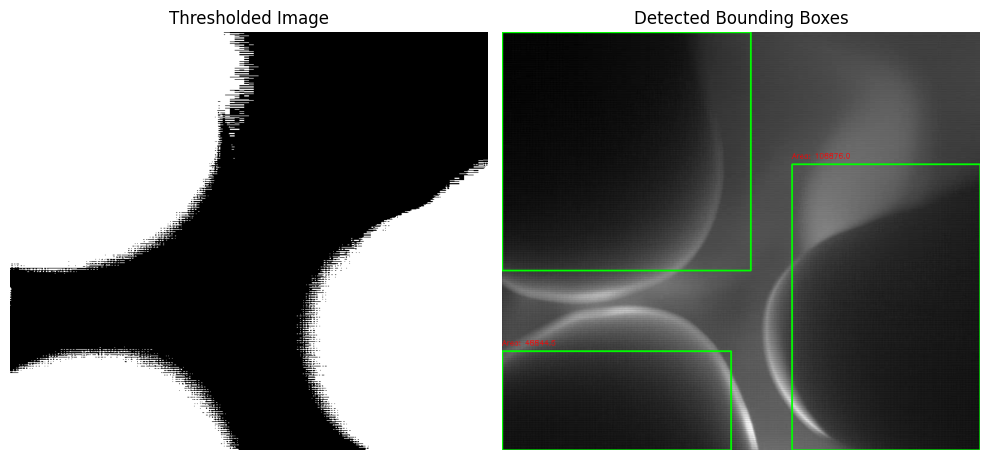

Bounding Boxes (normalized):
x: 0, y: 534, width: 383, height: 166
x: 485, y: 221, width: 315, height: 479
x: 0, y: 0, width: 416, height: 399


In [45]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def transform_and_detect(image_path, min_area=500):
    """
    Apply transformations and detect bounding boxes around white areas in the thresholded image.
    """
    # Load the grayscale image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Negative Transformation
    img_negative = cv2.bitwise_not(img)

    # Thresholding
    _, img_threshold = cv2.threshold(img_negative, 200, 255, cv2.THRESH_BINARY)

    # Detect contours in the thresholded image
    contours, _ = cv2.findContours(img_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Prepare an output image for visualization
    output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    bounding_boxes = []

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            # Calculate bounding box
            x, y, w, h = cv2.boundingRect(contour)
            bounding_boxes.append((x, y, w, h))

            # Draw bounding box on the output image
            cv2.rectangle(output_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # Optionally, label the bounding box with its area
            cv2.putText(output_img, f"Area: {area}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_threshold, cmap='gray')
    plt.title("Thresholded Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(output_img)
    plt.title("Detected Bounding Boxes")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return bounding_boxes

# Test the function on a sample image
test_image_path = "D:\\Frames\\vid5\\frame_29839.jpg"
bounding_boxes = transform_and_detect(test_image_path)

# Print the normalized bounding boxes
print("Bounding Boxes (normalized):")
for x, y, w, h in bounding_boxes:
    print(f"x: {x}, y: {y}, width: {w}, height: {h}")
